# Ch1

In [7]:
import numpy as np
import pandas as pd
import scipy as sp
from  scipy import stats
import statsmodels.formula.api as smf

from matplotlib import  pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline
%precision 3

np.random.seed(1)

In [4]:
# ビールのデータで単回帰分析を行う

beer=pd.read_csv('../data/5-1-1-beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


/Users/hasehiro/.pyenv/versions/3.6.5/envs/pycoon/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


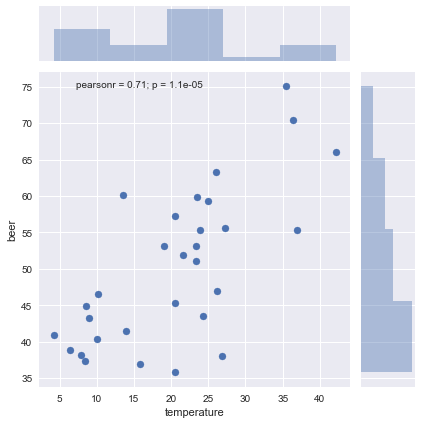

In [8]:
# データの特徴をつかむために可視化
sns.jointplot(x='temperature',y='beer',data=beer)

In [11]:
# モデルの構築
# 母集団部分布が正規分布だと仮定したときの最尤法は最小二乗法と一致するため、olsで近似
lm_model=smf.ols(formula="beer ~ temperature",data=beer).fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 03 May 2018   Prob (F-statistic):           1.11e-05
Time:                        17:47:34   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# AICをnull modelと比較
null_model=smf.ols('beer~1',data=beer).fit()
print(f'null_model_aic is {null_model.aic}')
print(f'lml_model_aic is {lm_model.aic}')

null_model_aic is 227.94194972563105
lml_model_aic is 208.90902935575437


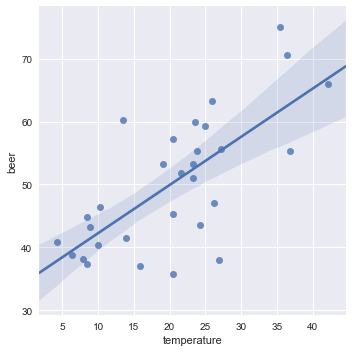

In [16]:
# seabornでも回帰直線は図事可能
sns.lmplot(x='temperature',y='beer',data=beer)

/Users/hasehiro/.pyenv/versions/3.6.5/envs/pycoon/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


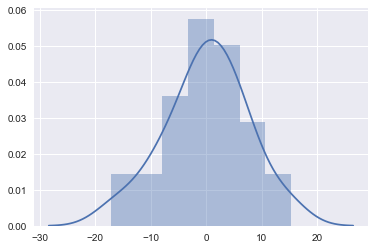

In [17]:
# 残差の確認
resid=lm_model.resid

sns.distplot(resid)